# Sequence labeling cnn depth ladder experiments

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from ast import literal_eval
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
%matplotlib inline

In [18]:
experiments_a = pd.read_csv('../models/experiments/seq_tag_cnn_depth_ladder/05_conv_layers/seq_tag_cnn_depth_ladder_exp_1_a.csv')
experiments_b = pd.read_csv('../models/experiments/seq_tag_cnn_depth_ladder/05_conv_layers/seq_tag_cnn_depth_ladder_exp_1_b.csv')
experiments_c = pd.read_csv('../models/experiments/seq_tag_cnn_depth_ladder/05_conv_layers/seq_tag_cnn_depth_ladder_exp_1_c.csv')
experiments_d = pd.read_csv('../models/experiments/seq_tag_cnn_depth_ladder/05_conv_layers/seq_tag_cnn_depth_ladder_exp_1_d.csv')

In [19]:
u_cost_0_a = experiments_a[experiments_a.experiment == 'exp_1_a_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.0']
u_cost_0_1_a = experiments_a[experiments_a.experiment == 'exp_1_a_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.1']
u_cost_0_3_a = experiments_a[experiments_a.experiment == 'exp_1_a_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.3']
u_cost_0_5_a = experiments_a[experiments_a.experiment == 'exp_1_a_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.5']
u_cost_0_b = experiments_b[experiments_b.experiment == 'exp_1_b_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.0']
u_cost_0_1_b = experiments_b[experiments_b.experiment == 'exp_1_b_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.1']
u_cost_0_3_b = experiments_b[experiments_b.experiment == 'exp_1_b_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.3']
u_cost_0_5_b = experiments_b[experiments_b.experiment == 'exp_1_b_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.5']
u_cost_0_c = experiments_c[experiments_c.experiment == 'exp_1_c_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.0']
u_cost_0_1_c = experiments_c[experiments_c.experiment == 'exp_1_c_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.1']
u_cost_0_3_c = experiments_c[experiments_c.experiment == 'exp_1_c_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.3']
u_cost_0_5_c = experiments_c[experiments_c.experiment == 'exp_1_c_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.5']
u_cost_0_d = experiments_d[experiments_d.experiment == 'exp_1_d_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.0']
u_cost_0_1_d = experiments_d[experiments_d.experiment == 'exp_1_d_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.1']
u_cost_0_3_d = experiments_d[experiments_d.experiment == 'exp_1_d_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.3']
u_cost_0_5_d = experiments_d[experiments_d.experiment == 'exp_1_d_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.5']

In [20]:
def build_traces(df, xaxis, yaxis, u_cost):
    traces = []
    for split_name, split in df.groupby(['split']):
        epoch_list = []
        lloss_list = []
        for epoch_name, epoch_group in split.groupby(['epoch']):
            epoch_list.append(int(epoch_name))
            lloss_list.append(epoch_group.lloss.mean())
        # epoch 21 == epoch 19 por eso dropeamos el ultimo elemento
#         if split_name == 'training':
#             color = '#0099ff'
#         elif split_name == 'validation':
#             color = '#fc8a00'
        name = ' '.join([u_cost, split_name])
        traces.append(go.Scatter(x=epoch_list[:-1], y=lloss_list[:-1],
#                                  marker=dict(color=color),
                                 name=name,
                                 xaxis=xaxis, yaxis=yaxis))
    return traces

In [21]:
def plot_experiments(df_list, title, yrange):
    all_traces = []
    u_cost_names = ['u_cost 0', 'u_cost 0.1', 'u_cost 0.3', 'u_cost 0.5']
    for idx_df, u_cost in zip(enumerate(df_list), u_cost_names):
        df = idx_df[1]
        df = df[df.split.isin(['training', 'validation'])]
        idx = str(idx_df[0]+1)
        all_traces += build_traces(df, xaxis='x'+idx, yaxis='y'+idx, u_cost=u_cost)
    figure = tools.make_subplots(rows=2, cols=2)
    figure.layout.yaxis.range = yrange
    figure.layout.yaxis2.range = yrange
    figure.layout.yaxis3.range = yrange
    figure.layout.yaxis4.range = yrange
    figure.layout.title = title
    _ = figure.add_traces(all_traces)
    iplot(figure, filename='multiple_figures')

In [22]:
df_list = [u_cost_0_a, u_cost_0_1_a, u_cost_0_3_a, u_cost_0_5_a]
title = 'Experiment a - Loss'
yrange = [0, 0.4]
plot_experiments(df_list, title, yrange)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



In [23]:
df_list = [u_cost_0_b, u_cost_0_1_b, u_cost_0_3_b, u_cost_0_5_b]
title = 'Experiment b - Loss'
yrange = [0, 0.4]
plot_experiments(df_list, title, yrange)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



### Experimento 01: desactivamos la parte no supervisada.

H0: evitar el uso del costo no supervisado hace que la red pueda reducir el coste supervisado en mayor medida.

100k oraciones - conv_layers 5 - conv_filter 100

In [35]:
experiments_d = pd.read_csv('../models/experiments/seq_tag_cnn_depth_ladder/05_conv_layers/seq_tag_cnn_depth_ladder_exp_1_d.csv')

In [36]:
experiments_d.head(1)

,experiment,split,epoch,accuracy,tloss,lloss,true,pred
0,exp_1_d_conv_layers_5_conv_filters_100_conv_ke...,training,1,0.923,0.355,0.258,[3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 4 4 4...,[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 1 4 4 4...


In [37]:
print(experiments_d.shape)
print(experiments_d.experiment.unique())

(9680000, 8)
['exp_1_d_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.0'
 'exp_1_d_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.1'
 'exp_1_d_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.3'
 'exp_1_d_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.5']


In [38]:
exp_01_d = experiments_d[experiments_d.experiment == 'exp_1_d_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.0']
exp_02_d = experiments_d[experiments_d.experiment == 'exp_1_d_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.1']
exp_03_d = experiments_d[experiments_d.experiment == 'exp_1_d_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.3']
exp_04_d = experiments_d[experiments_d.experiment == 'exp_1_d_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.5']

In [39]:
exp_01_d.shape

(2420000, 8)

In [40]:
def plot_sup_loss(df, title):
    sns.set_style('darkgrid')
    train_val_df = df[df.split.isin(['training', 'validation'])]
    ax_loss = sns.lineplot(x='epoch', y='lloss', hue='split', data=train_val_df)
    ax_loss.set_title(title)
    ax_loss.plot()

def plot_acc(df, title):
    sns.set_style('darkgrid')
    train_val_df = df[df.split.isin(['training', 'validation'])]
    ax_acc = sns.lineplot(x='epoch', y='accuracy', hue='split', data=train_val_df)
    ax_acc.set_title(title)
    ax_acc.plot()

def plot_report(df):
    val_epoch = df[(df.epoch == 19) &
                   (df.split == 'validation')]
    y_true = val_epoch.true.map(lambda x: np.asarray(x[1:-1].split(' '), dtype=np.int)).values
    y_pred = val_epoch.pred.map(lambda x: np.asarray(x[1:-1].split(' '), dtype=np.int)).values
    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)
    target_names = ['PER', 'LOC', 'ORG', 'MISC', 'O']
    print(classification_report(y_true, y_pred, target_names=target_names))

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


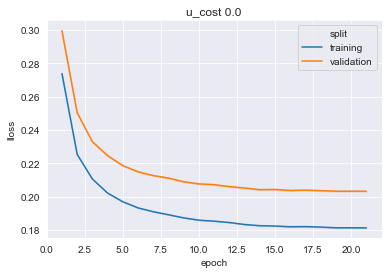

In [41]:
plot_sup_loss(exp_01_d, title='u_cost 0.0')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


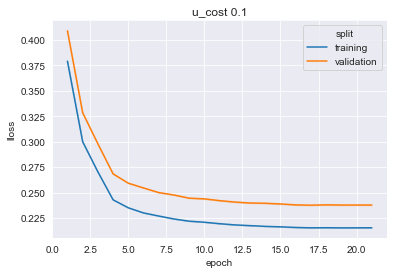

In [42]:
plot_sup_loss(exp_02_d, title='u_cost 0.1')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


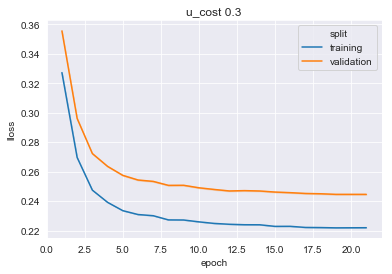

In [43]:
plot_sup_loss(exp_03_d, title='u_cost 0.3')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


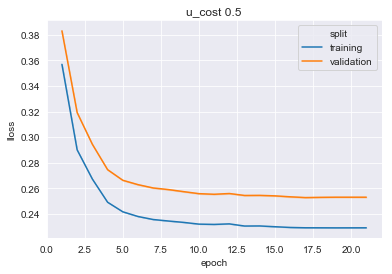

In [44]:
plot_sup_loss(exp_04_d, title='u_cost 0.5')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


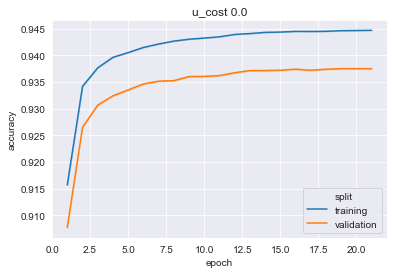

In [45]:
plot_acc(exp_01_d, title='u_cost 0.0')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


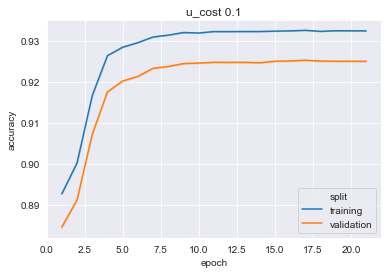

In [46]:
plot_acc(exp_02_d, title='u_cost 0.1')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


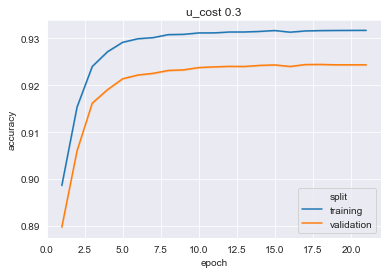

In [47]:
plot_acc(exp_03_d, title='u_cost 0.3')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


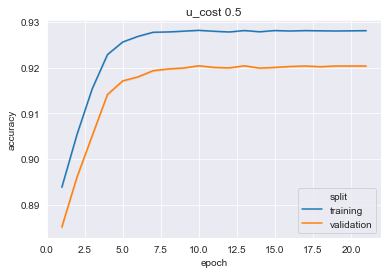

In [48]:
plot_acc(exp_04_d, title='u_cost 0.5')

In [49]:
plot_report(exp_01_d)

             precision    recall  f1-score   support

        PER       0.71      0.76      0.73     16331
        LOC       0.73      0.67      0.70     17874
        ORG       0.60      0.54      0.57     11697
       MISC       0.59      0.41      0.48     23557
          O       0.97      0.98      0.98    530541

avg / total       0.93      0.94      0.93    600000



In [50]:
plot_report(exp_02_d)

             precision    recall  f1-score   support

        PER       0.69      0.71      0.70     16331
        LOC       0.67      0.60      0.63     17874
        ORG       0.53      0.31      0.39     11697
       MISC       0.48      0.24      0.32     23557
          O       0.95      0.99      0.97    530541

avg / total       0.91      0.93      0.92    600000



In [51]:
plot_report(exp_03_d)

             precision    recall  f1-score   support

        PER       0.68      0.70      0.69     16331
        LOC       0.66      0.58      0.62     17874
        ORG       0.50      0.34      0.41     11697
       MISC       0.49      0.22      0.31     23557
          O       0.95      0.99      0.97    530541

avg / total       0.91      0.92      0.92    600000



In [52]:
plot_report(exp_04_d)

             precision    recall  f1-score   support

        PER       0.68      0.69      0.68     16331
        LOC       0.61      0.55      0.58     17874
        ORG       0.47      0.20      0.28     11697
       MISC       0.45      0.21      0.28     23557
          O       0.95      0.99      0.97    530541

avg / total       0.90      0.92      0.91    600000



# Experimentos c)

100k oraciones - conv_layers 5 - conv_filter 100

In [53]:
experiments_c = pd.read_csv('../models/experiments/seq_tag_cnn_depth_ladder/05_conv_layers/seq_tag_cnn_depth_ladder_exp_1_c.csv')

In [54]:
experiments_c.head(1)

,experiment,split,epoch,accuracy,tloss,lloss,true,pred
0,exp_1_c_conv_layers_5_conv_filters_100_conv_ke...,training,1,0.913,0.367,0.27,[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4...,[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4...


In [55]:
print(experiments_c.shape)
print(experiments_c.experiment.unique())

(7680000, 8)
['exp_1_c_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.0'
 'exp_1_c_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.1'
 'exp_1_c_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.3'
 'exp_1_c_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.5']


In [56]:
exp_01_c = experiments_c[experiments_c.experiment == 'exp_1_c_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.0']
exp_02_c = experiments_c[experiments_c.experiment == 'exp_1_c_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.1']
exp_03_c = experiments_c[experiments_c.experiment == 'exp_1_c_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.3']
exp_04_c = experiments_c[experiments_c.experiment == 'exp_1_c_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.5']

In [57]:
exp_01_c.shape

(1920000, 8)

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


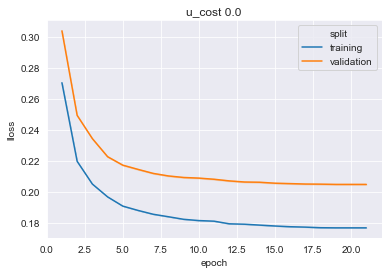

In [59]:
plot_sup_loss(exp_01_c, title='u_cost 0.0')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


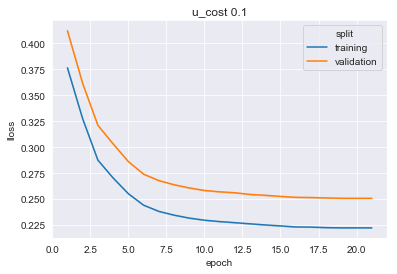

In [60]:
plot_sup_loss(exp_02_c, title='u_cost 0.1')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


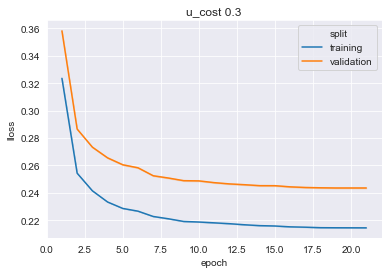

In [61]:
plot_sup_loss(exp_03_c, title='u_cost 0.3')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


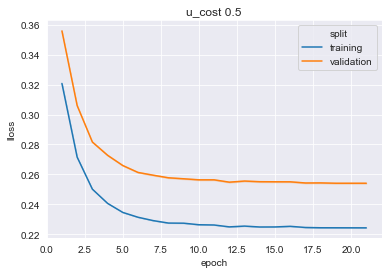

In [62]:
plot_sup_loss(exp_04_c, title='u_cost 0.5')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


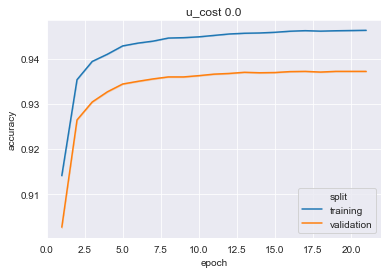

In [63]:
plot_acc(exp_01_c, title='u_cost 0.0')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


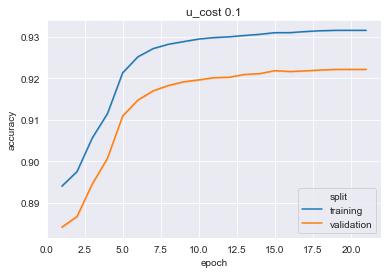

In [64]:
plot_acc(exp_02_c, title='u_cost 0.1')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


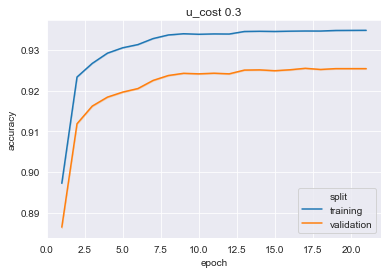

In [65]:
plot_acc(exp_03_c, title='u_cost 0.3')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


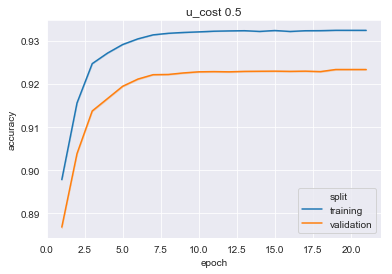

In [66]:
plot_acc(exp_04_c, title='u_cost 0.5')

In [67]:
plot_report(exp_01_c)

             precision    recall  f1-score   support

        PER       0.71      0.76      0.73     16331
        LOC       0.73      0.66      0.69     17874
        ORG       0.60      0.54      0.57     11697
       MISC       0.59      0.39      0.47     23557
          O       0.97      0.98      0.98    530541

avg / total       0.93      0.94      0.93    600000



In [68]:
plot_report(exp_02_c)

             precision    recall  f1-score   support

        PER       0.68      0.68      0.68     16331
        LOC       0.64      0.57      0.60     17874
        ORG       0.48      0.22      0.30     11697
       MISC       0.44      0.25      0.32     23557
          O       0.95      0.99      0.97    530541

avg / total       0.91      0.92      0.91    600000



In [69]:
plot_report(exp_03_c)

             precision    recall  f1-score   support

        PER       0.69      0.71      0.70     16331
        LOC       0.68      0.59      0.63     17874
        ORG       0.53      0.28      0.37     11697
       MISC       0.47      0.26      0.34     23557
          O       0.95      0.99      0.97    530541

avg / total       0.91      0.93      0.92    600000



In [70]:
plot_report(exp_04_c)

             precision    recall  f1-score   support

        PER       0.69      0.70      0.69     16331
        LOC       0.64      0.58      0.61     17874
        ORG       0.50      0.25      0.34     11697
       MISC       0.47      0.26      0.33     23557
          O       0.95      0.99      0.97    530541

avg / total       0.91      0.92      0.91    600000



# Experimentos b)

100k oraciones - conv_layers 5 - conv_filter 100

In [71]:
experiments_b = pd.read_csv('../models/experiments/seq_tag_cnn_depth_ladder/05_conv_layers/seq_tag_cnn_depth_ladder_exp_1_b.csv')

In [72]:
experiments_b.head(1)

,experiment,split,epoch,accuracy,tloss,lloss,true,pred
0,exp_1_b_conv_layers_5_conv_filters_100_conv_ke...,training,1,0.915,0.365,0.275,[4 4 4 4 4 4 4 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4...,[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4...


In [73]:
print(experiments_b.shape)
print(experiments_b.experiment.unique())

(5680000, 8)
['exp_1_b_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.0'
 'exp_1_b_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.1'
 'exp_1_b_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.3'
 'exp_1_b_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.5']


In [74]:
exp_01_b = experiments_b[experiments_b.experiment == 'exp_1_b_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.0']
exp_02_b = experiments_b[experiments_b.experiment == 'exp_1_b_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.1']
exp_03_b = experiments_b[experiments_b.experiment == 'exp_1_b_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.3']
exp_04_b = experiments_b[experiments_b.experiment == 'exp_1_b_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.5']

In [75]:
exp_01_b.shape

(1420000, 8)

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


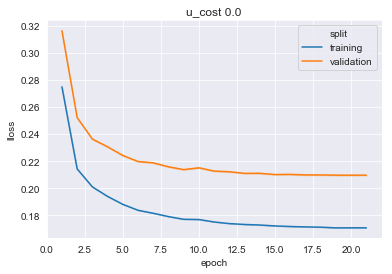

In [76]:
plot_sup_loss(exp_01_b, title='u_cost 0.0')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


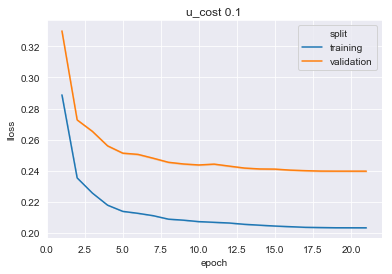

In [77]:
plot_sup_loss(exp_02_b, title='u_cost 0.1')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


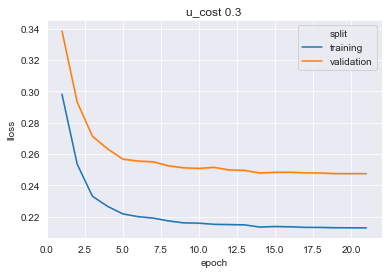

In [78]:
plot_sup_loss(exp_03_b, title='u_cost 0.3')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


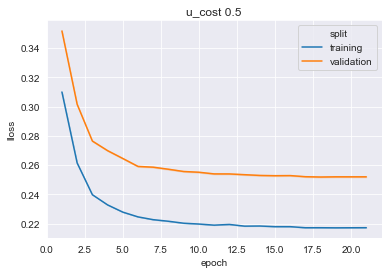

In [79]:
plot_sup_loss(exp_04_b, title='u_cost 0.5')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


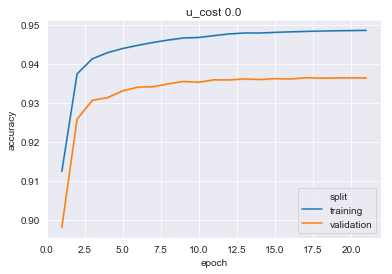

In [80]:
plot_acc(exp_01_b, title='u_cost 0.0')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


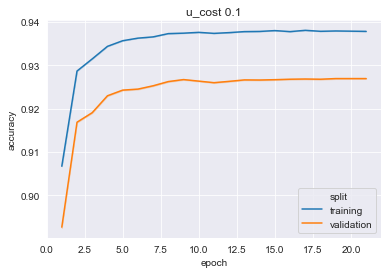

In [81]:
plot_acc(exp_02_b, title='u_cost 0.1')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


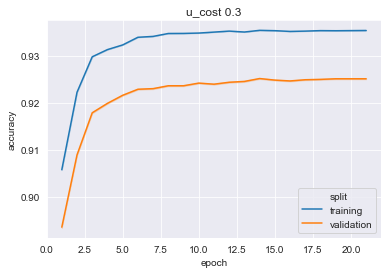

In [82]:
plot_acc(exp_03_b, title='u_cost 0.3')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


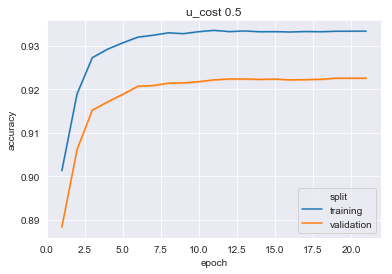

In [83]:
plot_acc(exp_04_b, title='u_cost 0.5')

In [84]:
plot_report(exp_01_b)

             precision    recall  f1-score   support

        PER       0.71      0.75      0.73     16331
        LOC       0.73      0.65      0.69     17874
        ORG       0.59      0.53      0.56     11697
       MISC       0.58      0.39      0.46     23557
          O       0.97      0.98      0.98    530541

avg / total       0.93      0.94      0.93    600000



In [85]:
plot_report(exp_02_b)

             precision    recall  f1-score   support

        PER       0.70      0.71      0.70     16331
        LOC       0.70      0.59      0.64     17874
        ORG       0.52      0.38      0.44     11697
       MISC       0.49      0.27      0.35     23557
          O       0.96      0.99      0.97    530541

avg / total       0.92      0.93      0.92    600000



In [86]:
plot_report(exp_03_b)

             precision    recall  f1-score   support

        PER       0.70      0.70      0.70     16331
        LOC       0.66      0.59      0.62     17874
        ORG       0.50      0.35      0.41     11697
       MISC       0.49      0.22      0.30     23557
          O       0.95      0.99      0.97    530541

avg / total       0.91      0.92      0.92    600000



In [87]:
plot_report(exp_04_b)

             precision    recall  f1-score   support

        PER       0.67      0.71      0.69     16331
        LOC       0.64      0.57      0.60     17874
        ORG       0.48      0.27      0.34     11697
       MISC       0.47      0.22      0.30     23557
          O       0.95      0.99      0.97    530541

avg / total       0.91      0.92      0.91    600000



# Experimentos a)

100k oraciones - conv_layers 5 - conv_filter 100

In [88]:
experiments_a = pd.read_csv('../models/experiments/seq_tag_cnn_depth_ladder/05_conv_layers/seq_tag_cnn_depth_ladder_exp_1_a.csv')

In [89]:
experiments_a.head(1)

,experiment,split,epoch,accuracy,tloss,lloss,true,pred
0,exp_1_a_conv_layers_5_conv_filters_100_conv_ke...,training,1,0.926,0.345,0.247,[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4...,[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4...


In [90]:
print(experiments_a.shape)
print(experiments_a.experiment.unique())

(3680000, 8)
['exp_1_a_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.0'
 'exp_1_a_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.1'
 'exp_1_a_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.3'
 'exp_1_a_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.5']


In [91]:
exp_01_a = experiments_a[experiments_a.experiment == 'exp_1_a_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.0']
exp_02_a = experiments_a[experiments_a.experiment == 'exp_1_a_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.1']
exp_03_a = experiments_a[experiments_a.experiment == 'exp_1_a_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.3']
exp_04_a = experiments_a[experiments_a.experiment == 'exp_1_a_conv_layers_5_conv_filters_100_conv_kernels_[2]_u_cost_weight_0.5']

In [92]:
exp_01_a.shape

(920000, 8)

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


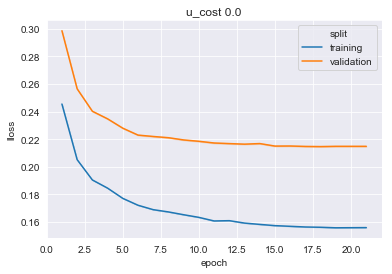

In [93]:
plot_sup_loss(exp_01_a, title='u_cost 0.0')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


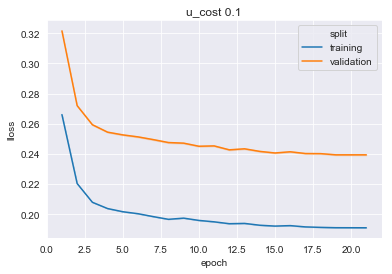

In [94]:
plot_sup_loss(exp_02_a, title='u_cost 0.1')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


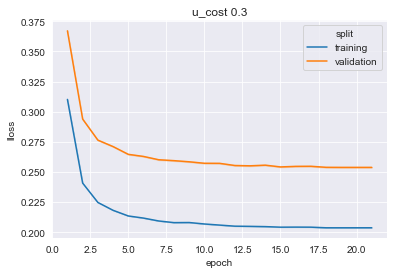

In [95]:
plot_sup_loss(exp_03_a, title='u_cost 0.3')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


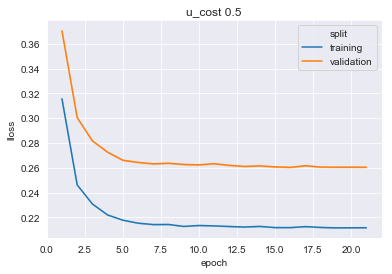

In [96]:
plot_sup_loss(exp_04_a, title='u_cost 0.5')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


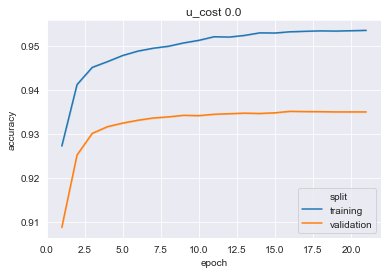

In [97]:
plot_acc(exp_01_a, title='u_cost 0.0')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


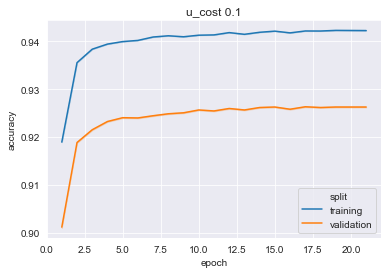

In [98]:
plot_acc(exp_02_a, title='u_cost 0.1')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


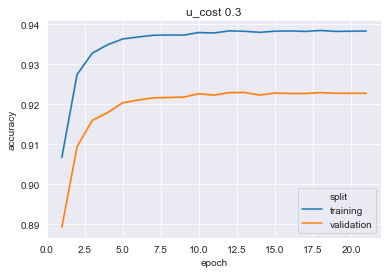

In [99]:
plot_acc(exp_03_a, title='u_cost 0.3')

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


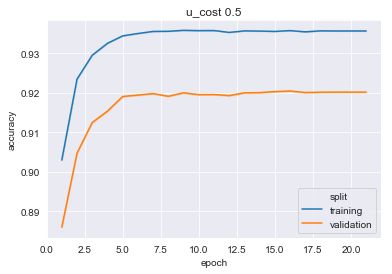

In [100]:
plot_acc(exp_04_a, title='u_cost 0.5')

In [101]:
plot_report(exp_01_a)

             precision    recall  f1-score   support

        PER       0.70      0.74      0.72     16331
        LOC       0.73      0.64      0.68     17874
        ORG       0.57      0.54      0.55     11697
       MISC       0.57      0.38      0.46     23557
          O       0.97      0.98      0.98    530541

avg / total       0.93      0.93      0.93    600000



In [102]:
plot_report(exp_02_a)

             precision    recall  f1-score   support

        PER       0.69      0.71      0.70     16331
        LOC       0.67      0.62      0.64     17874
        ORG       0.55      0.32      0.40     11697
       MISC       0.50      0.24      0.33     23557
          O       0.95      0.99      0.97    530541

avg / total       0.91      0.93      0.92    600000



In [103]:
plot_report(exp_03_a)

             precision    recall  f1-score   support

        PER       0.70      0.67      0.68     16331
        LOC       0.66      0.56      0.61     17874
        ORG       0.51      0.27      0.36     11697
       MISC       0.47      0.24      0.32     23557
          O       0.95      0.99      0.97    530541

avg / total       0.91      0.92      0.91    600000



In [104]:
plot_report(exp_04_a)

             precision    recall  f1-score   support

        PER       0.70      0.66      0.68     16331
        LOC       0.63      0.56      0.59     17874
        ORG       0.47      0.19      0.28     11697
       MISC       0.49      0.17      0.25     23557
          O       0.94      0.99      0.97    530541

avg / total       0.90      0.92      0.91    600000



In [ ]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

/home/ekokic/miniconda3/envs/thesis-tf-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


IndexError: index 2 is out of bounds for axis 0 with size 2

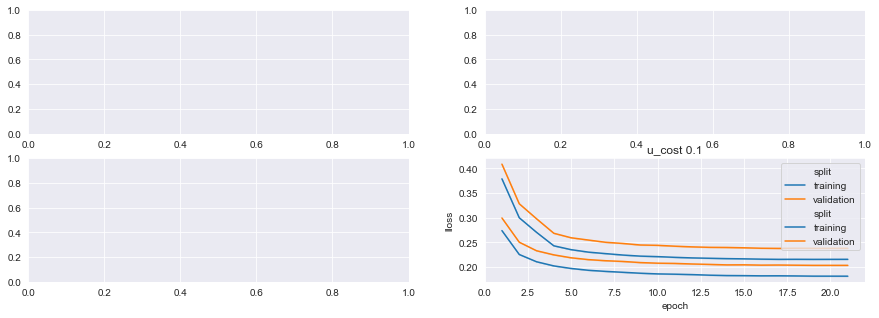

In [18]:
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(15,5))
plot_sup_loss(exp_01_d, title='u_cost 0.0', ax=axs[0])
plot_sup_loss(exp_02_d, title='u_cost 0.1', ax=axs[1])
plot_sup_loss(exp_03_d, title='u_cost 0.3', ax=axs[2])
plot_sup_loss(exp_03_d, title='u_cost 0.5', ax=axs[3])

In [ ]:
# TODO: adaptar esto
def plot_sales_dist(df, title, ax):
    bins = [0, 1, 5, 10, 50, 100, 1000, 10000, 200000]
    df['bin'] = pd.cut(df['ORD'], bins=bins)
    freqs = df.groupby('bin')['FREQ'].agg('sum')
    ax = freqs.plot(kind='bar', title=title, ax=ax)
    ax.set(xlabel="# sales", ylabel="# products")

print('Distribución de venta de productos')
sns.set(style='darkgrid')
fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
plot_sales_dist(co_df, title='Colombia', ax=axs[0])
plot_sales_dist(mx_df, title='Mexico', ax=axs[1])
plot_sales_dist(br_df, title='Brasil', ax=axs[2])